Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Load Dataset

In [ ]:
print("Loading data...")
X_train = np.load('data/augmented/X_train.npy', allow_pickle=True)
X_test = np.load('data/augmented/X_test.npy', allow_pickle=True)
y_train = np.load('data/augmented/y_train.npy', allow_pickle=True)
y_test = np.load('data/augmented/y_test.npy', allow_pickle=True)

print("Data loaded successfully.")

Loading data...
Data loaded successfully.


Data Inspection & Label Encoding

In [ ]:
print("--- Array Shapes ---")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")

# Encode class labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)
class_names = le.classes_

print(f"\nClasses detected: {class_names}")
print(f"Original Feature Count: {X_train.shape[1]}")

--- Array Shapes ---
X_train: (3456, 86)
y_train: (3456,)
X_test:  (144, 86)
y_test:  (144,)

Classes detected: ['german' 'italian' 'korean' 'spanish']
Original Feature Count: 86


Initialize Classifiers

In [ ]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Naïve Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM (RBF)": SVC(kernel='rbf', random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

print("Models initialized.")

Models initialized.


Train Models & Plot Results


MODEL EVALUATION METRICS
--- KNN ---
Accuracy:  0.9861
Precision: 0.9868
Recall:    0.9861
F1-Score:  0.9862

--- Decision Tree ---
Accuracy:  0.9514
Precision: 0.9525
Recall:    0.9514
F1-Score:  0.9517

--- Logistic Regression ---
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000

--- Naïve Bayes ---
Accuracy:  0.8264
Precision: 0.8610
Recall:    0.8264
F1-Score:  0.8215

--- Random Forest ---
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000

--- SVM (RBF) ---
Accuracy:  0.9931
Precision: 0.9932
Recall:    0.9931
F1-Score:  0.9931

--- MLP ---
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000



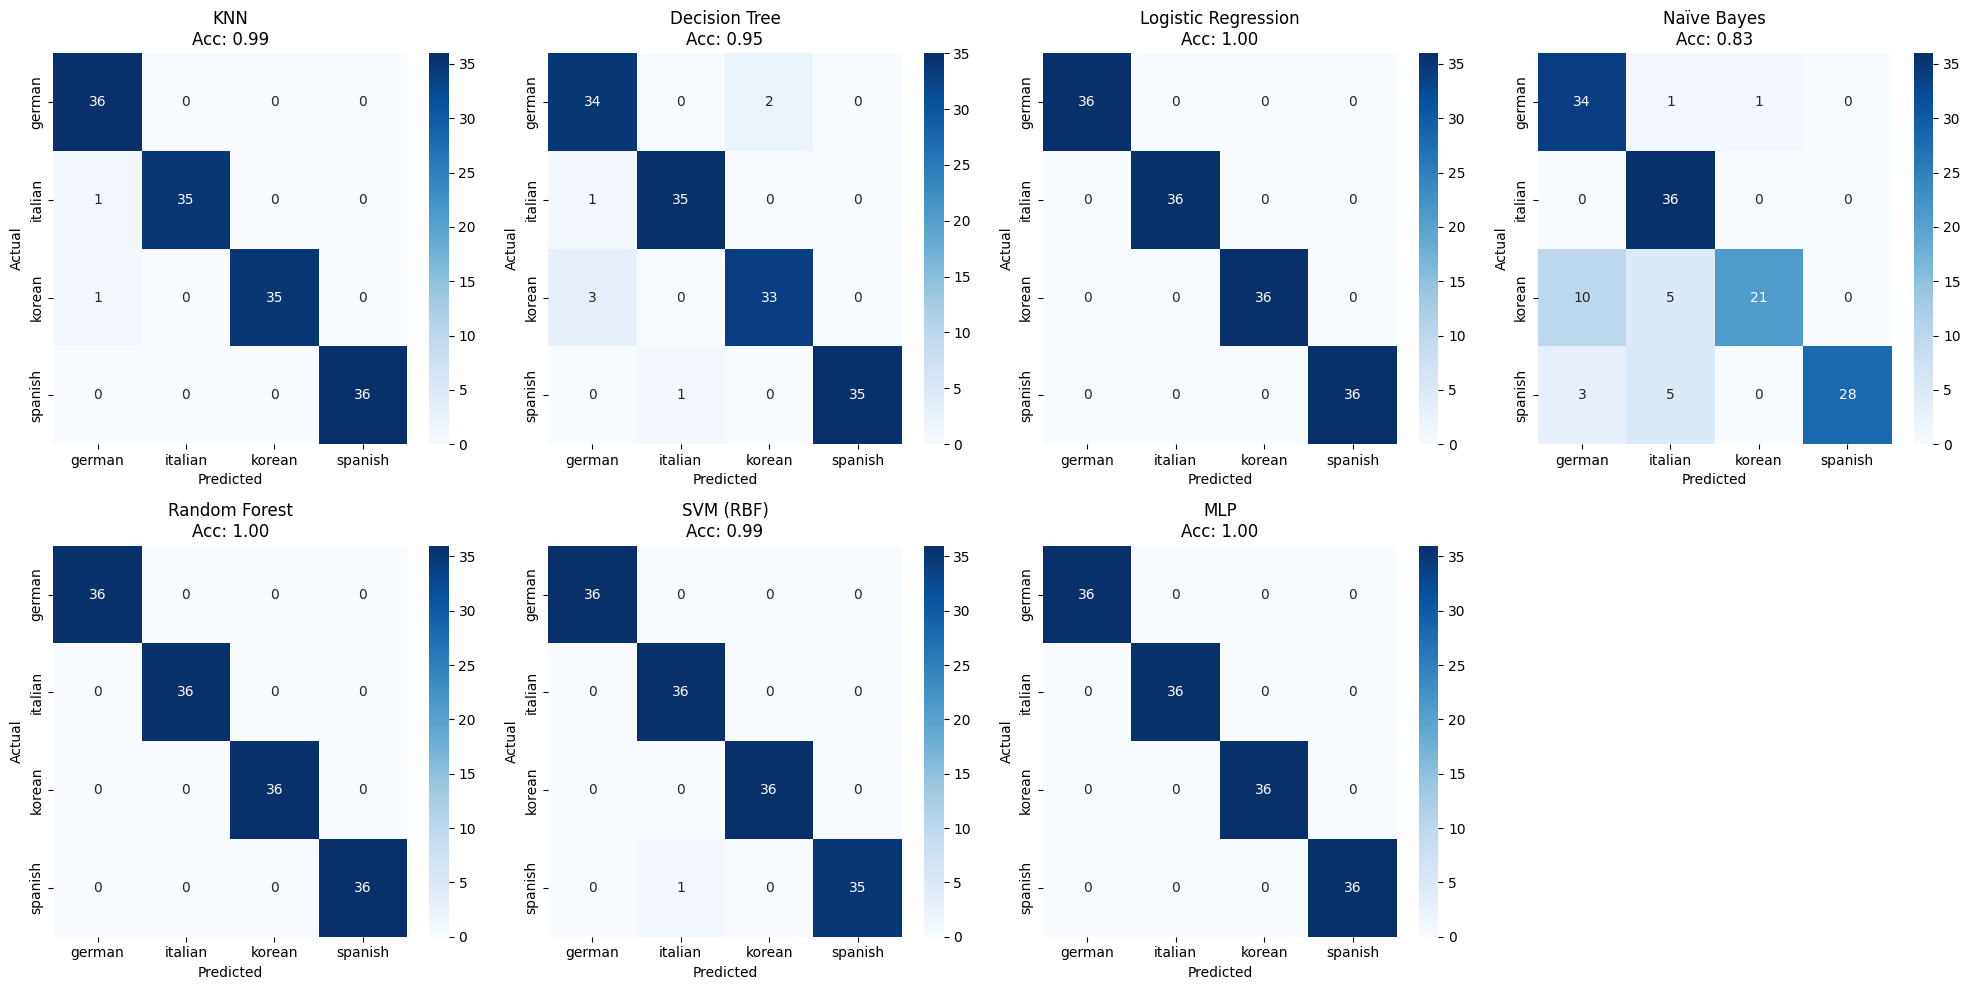

In [ ]:
results = []
plt.figure(figsize=(20, 10))

# Grid layout for subplots: 2 rows x 4 columns
rows = 2
cols = 4

print("\n" + "="*50)
print("MODEL EVALUATION METRICS")
print("="*50)

for i, (name, model) in enumerate(models.items()):
    # Train
    model.fit(X_train, y_train_enc)

    # Predict
    y_pred = model.predict(X_test)

    # Calculate Metrics
    acc = accuracy_score(y_test_enc, y_pred)
    prec = precision_score(y_test_enc, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test_enc, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test_enc, y_pred, average='weighted', zero_division=0)

    # Store results
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })

    # Print individual results
    print(f"--- {name} ---")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-Score:  {f1:.4f}\n")

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test_enc, y_pred)
    plt.subplot(rows, cols, i+1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'{name}\nAcc: {acc:.2f}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

Final Comparison Table

In [ ]:
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
print("\n" + "="*50)
print("FINAL COMPARISON TABLE")
print("="*50)
print(results_df.to_string(index=False))


FINAL COMPARISON TABLE
              Model  Accuracy  Precision   Recall  F1-Score
Logistic Regression  1.000000   1.000000 1.000000  1.000000
                MLP  1.000000   1.000000 1.000000  1.000000
      Random Forest  1.000000   1.000000 1.000000  1.000000
          SVM (RBF)  0.993056   0.993243 0.993056  0.993054
                KNN  0.986111   0.986842 0.986111  0.986201
      Decision Tree  0.951389   0.952454 0.951389  0.951659
        Naïve Bayes  0.826389   0.860977 0.826389  0.821471
